
    Yudha Cipta M. Y.
    Hacktiv8 - Batch 01
   

## About this dataset

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

this dataset originated from ucL : https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

### Attribute Information:

Column Descriptions:
- Administrative: This is the number of pages of this type (administrative) that the user visited.

- Administrative_Duration: This is the amount of time spent in this category of pages.

- Informational: This is the number of pages of this type (informational) that the user visited.

- Informational_Duration: This is the amount of time spent in this category of pages. 

- ProductRelated: This is the number of pages of this type (product related) that the user visited.

- ProductRelated_Duration: This is the amount of time spent in this category of pages.

- BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

- ExitRates: The percentage of pageviews on the website that end at that specific page.

- PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

- SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

- Month: Contains the month the pageview occurred, in string form.

- OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

- Browser: An integer value representing the browser that the user was using to view the page.

- Region: An integer value representing which region the user is located in.

- TrafficType: An integer value representing what type of traffic the user is categorized into.

- VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

- Weekend: A boolean representing whether the session is on a weekend.

- Revenue: A boolean representing whether or not the user completed the purchase.

### import library

In [1]:
#Data exploration
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy.stats as st

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score, mean_squared_error
from sklearn.pipeline import Pipeline 
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Data Loading

In [2]:
#load data while convert unknown values to nan
df = pd.read_csv("online_shoppers_intention.csv")
print(df.shape)
df.head()

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Data Cleaning

In [6]:
df.duplicated().any()

True

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum().sort_values(ascending=False)

Administrative             0
Administrative_Duration    0
Weekend                    0
VisitorType                0
TrafficType                0
Region                     0
Browser                    0
OperatingSystems           0
Month                      0
SpecialDay                 0
PageValues                 0
ExitRates                  0
BounceRates                0
ProductRelated_Duration    0
ProductRelated             0
Informational_Duration     0
Informational              0
Revenue                    0
dtype: int64

fortunately there are no missing value

In [9]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

### Data Exploration

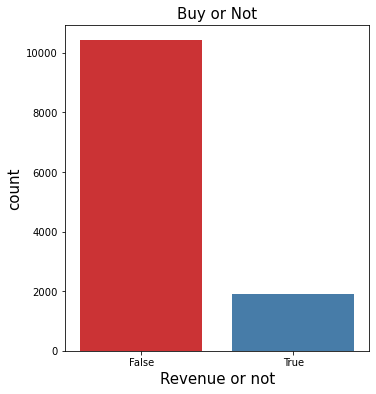

In [10]:
plt.rcParams['figure.figsize'] = (12, 6)

plt.subplot(1, 2, 1)
sns.countplot(df['Revenue'], palette = 'Set1')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

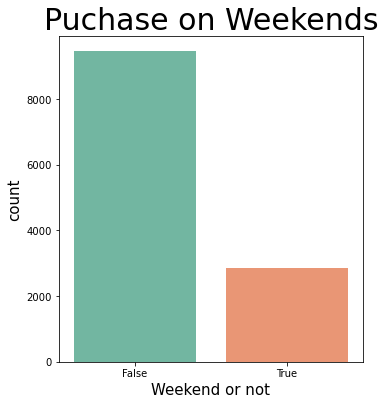

In [11]:
#checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (12,6)
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'Set2')
plt.title('Puchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

From the above information we see that the distribution of Revenue data are hightly imbalanced.

In [12]:
df['Browser']

0        1
1        2
2        1
3        2
4        3
        ..
12325    6
12326    2
12327    2
12328    2
12329    2
Name: Browser, Length: 12330, dtype: int64

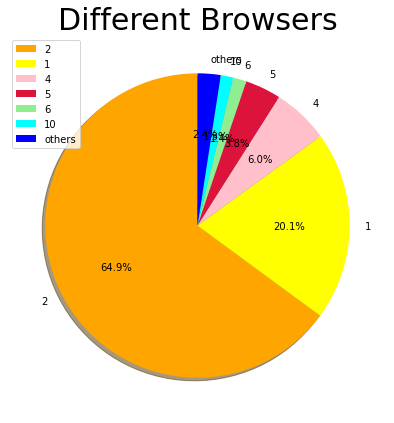

In [13]:
# Ploting a pie chart for operating systems
plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1", "4", "5", "6", "10", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.1f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

up top 90% data and they only used top 3 browser

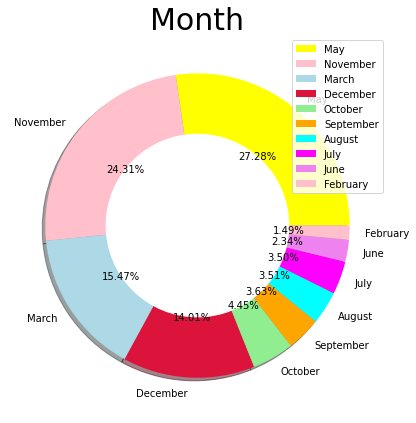

In [14]:
# creating a donut chart for the months variations
# plotting a pie chart for share of special days
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Month', ylabel='count'>

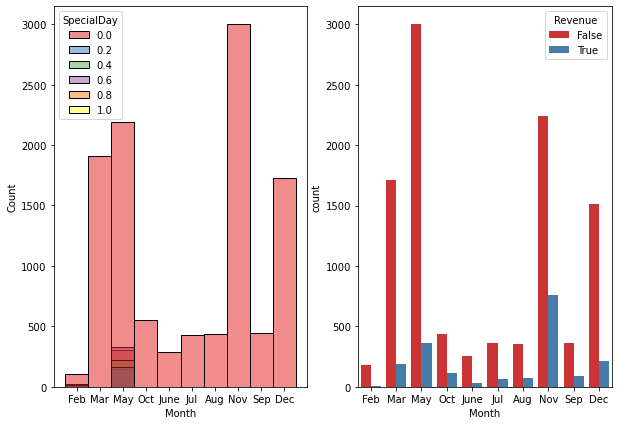

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,7))
sns.histplot(x='Month',data=df,hue='SpecialDay',ax=ax1, palette="Set1")
sns.countplot(x='Month',data=df,hue='Revenue',ax=ax2, palette="Set1")

with a large pageview value it is also give a high chance the customer to buy things online, especially on special day o february and may

_operating system & different visitor_

<AxesSubplot:xlabel='OperatingSystems', ylabel='count'>

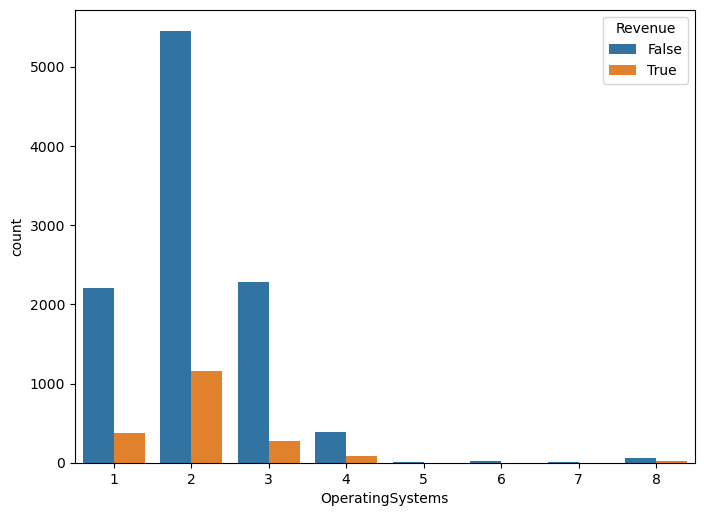

In [16]:
plt.figure(figsize=(8,6),dpi=100)
sns.countplot(data=df,x='OperatingSystems',hue='Revenue')

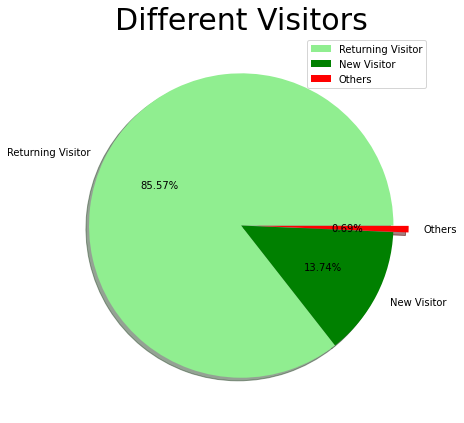

In [17]:
# plotting a pie chart for Visitors

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'red']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

as we can see percentage of returning visitor 85% which is great and again top 3 operating system has already covered more than 90% for this dataset.

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

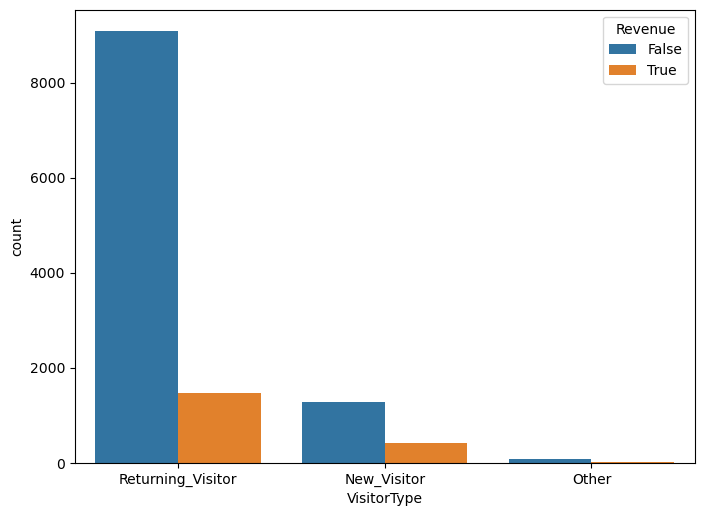

In [60]:
plt.figure(figsize=(8,6),dpi=100)
sns.countplot(data=df,x='VisitorType',hue='Revenue')

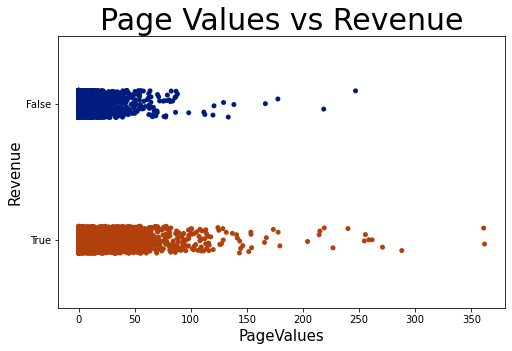

In [18]:
# strip plot for page values vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['PageValues'], df['Revenue'], palette = 'dark', orient = 'h')
plt.title('Page Values vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

Most important things is here PageValues are highly influenced to purchased(True) a product.

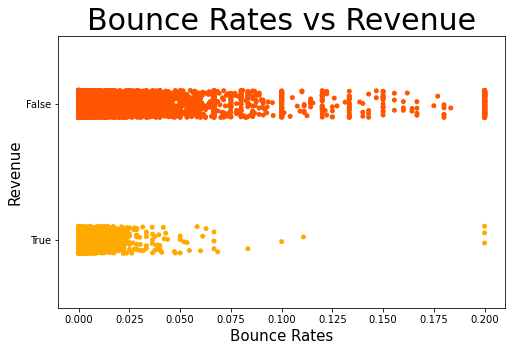

In [19]:
# strip plot for bounce rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['BounceRates'], df['Revenue'], palette = 'autumn', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

 BounceRates is highly influenced to buy a product or not.

<AxesSubplot:xlabel='ExitRates', ylabel='BounceRates'>

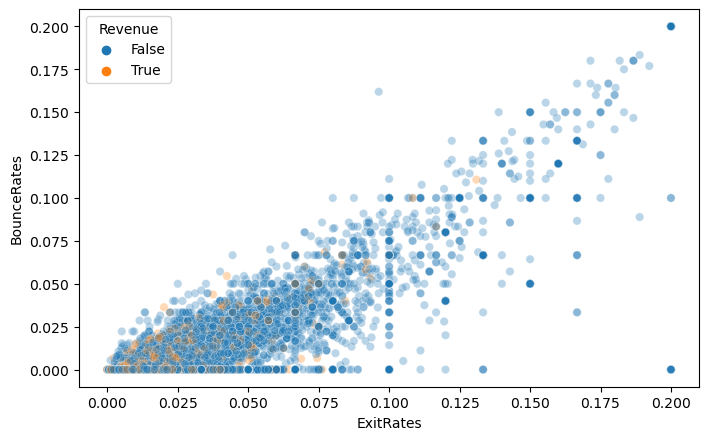

In [58]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(data=df,x='ExitRates',y='BounceRates',hue='Revenue',alpha=0.3)

distribution check

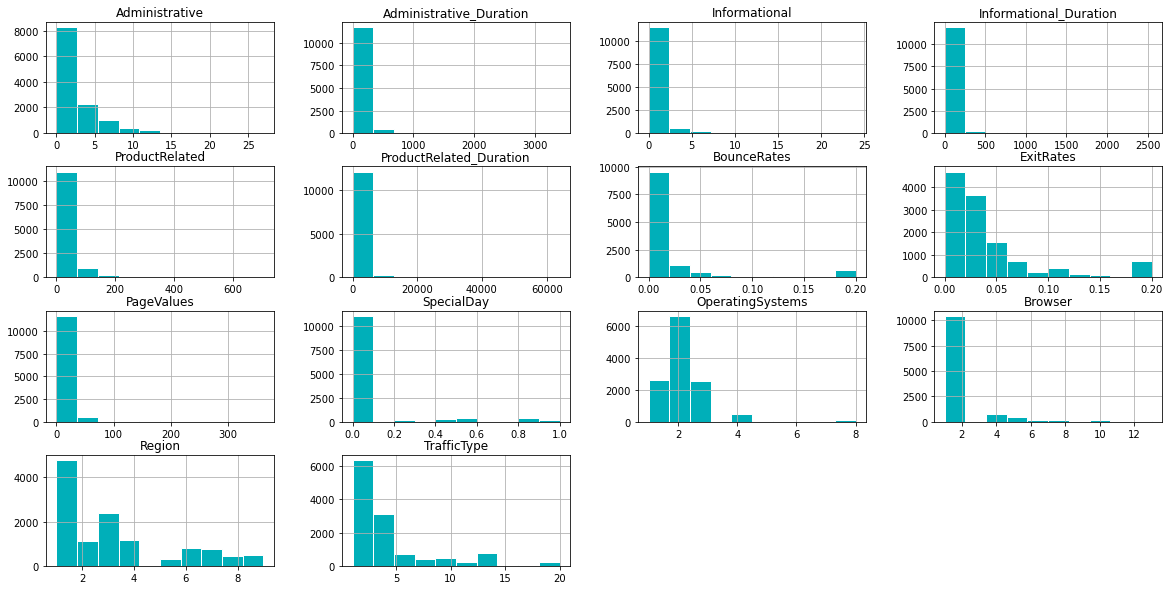

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [21]:
numbers = df.select_dtypes(['int64', 'float64']).columns.to_list()

df.hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()

display(df[numbers].describe())

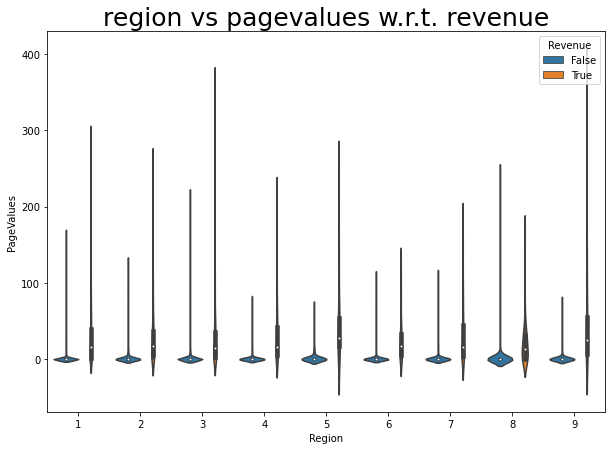

In [22]:
# violin plot for region vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = df['Region'], y = df['PageValues'], hue = df['Revenue'])
plt.title('region vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()

from the graph above we can see so many outliers, Region vs PageValues are exponentially distributed when users purchased a product or not.

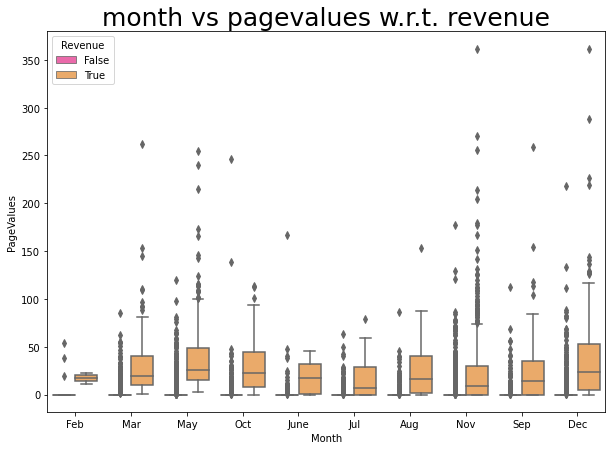

In [23]:
# boxplot for month vs pagevalues w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'spring')
plt.title('month vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()

Month vs pagevalues are normally(Gaussian) distributed when users purchased a product for some Month but some them are exponentially distributed.

correlations check

<AxesSubplot:>

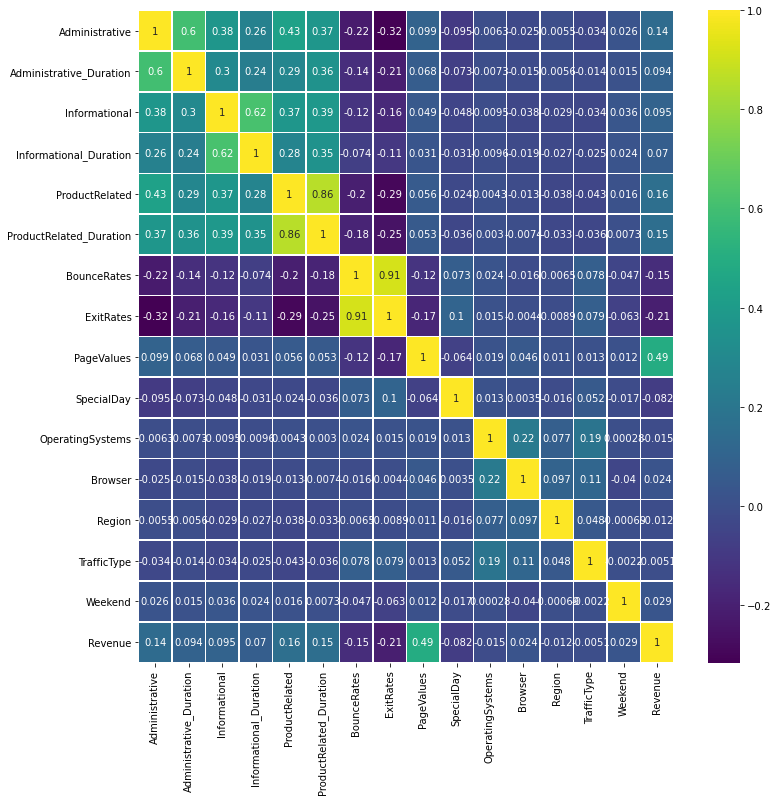

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

defining categorical column, then tested wether they influenced revenue or not with chi square. with H0=the proportion of revenue accross the category is same and H1 = the proportion of revenue at least in 2 category is different

In [25]:
cat_cols=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']

In [26]:
scol = []
spval = []
ss = []
for n in cat_cols:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(df[n], df['Revenue']))[1]
    spval.append(round(cp, 4))
    if cp < 0.05:
        # rejects Null Hypothesis
        ss.append('*') # significant
    else:
        # Accept Null Hypothesis
        ss.append('**') # not significant

In [27]:
pd.DataFrame({'Feature': scol, 'P-Value': spval, 'Significance': ss})

,Feature,P-Value,Significance
0,Administrative,0.0000,*
1,Informational,0.0000,*
2,ProductRelated,0.0000,*
3,Month,0.0000,*
4,OperatingSystems,0.0000,*
5,Browser,0.0061,*
6,Region,0.3214,**
7,TrafficType,0.0000,*
8,VisitorType,0.0000,*
9,Weekend,0.0013,*


##### EDA conclusion
- The value of revenue itself is imbalance.
- most of the distribution of this dataset is not normal.
- we have a nice returning visitor data which could help for marketing.
- there are 20 different traffic type codes and 9 different region codes in this dataset.
- according to chisquared test, categorical column other than region related and influencing the revenue

### Data Preprocessing

encoding data with one hot encoding (dummies)

In [28]:
data = pd.get_dummies(df)
print(data.shape)
data.head()

(12330, 29)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# Label encoding of revenue
encode = LabelEncoder()
data['Revenue'] = encode.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [30]:
data['Weekend'] = encode.fit_transform(data['Weekend'])

In [31]:
#define x and y for model ML
y = data['Revenue']
X = data.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of x: ", X.shape)
print("Shape of y: ", y.shape)

Shape of x:  (12330, 28)
Shape of y:  (12330,)


_splitting data_

In [32]:
#split data into 3 data for training and validation, and hold 1 group data for testing in the end

#train=70%
#validation=15%
#holdouttest=15%

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
X_validation,X_holdouttest,y_validation,y_holdouttest = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [35]:
print(len(X),len(X_train),len(X_validation),len(X_holdouttest))

12330 8631 1849 1850


### Model Definition and Training

Creating pipelines for Logistic regression, Random Forest and Gaussian NaiveBayes models
Pipeline steps will include
Data Preprocessing using MinMax Scaler
Reducing Dimensionality using PCA
Training respective models

In [36]:
#Logistic Regression Pipeline
LogisticRegressionCVPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('logistic_classifier',LogisticRegressionCV())])

In [37]:
#Random Forest Pipeline
RandomForestPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('randomforest_classifier',RandomForestClassifier())])

In [38]:
#NaiveBayes Pipeline
NaiveBayesPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('NaiveBayes_classifier',GaussianNB())])

training & evaluate

In [39]:
mypipeline = [LogisticRegressionCVPipeline, RandomForestPipeline, NaiveBayesPipeline]

In [40]:
#Defining variables for choosing best model
accuracy=0.0
classifier=0
pipeline=""

In [41]:
# Creating dictionary of pipelines and training models
PipelineDict = {0: 'Logistic RegressionCV', 1: 'Random Forest', 2: 'Naives Bayes'}

# Fit the pipelines
for mypipe in mypipeline:
    mypipe.fit(X_train, y_train)

In [42]:
#getting train accuracy for all classifiers
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_train,y_train)))

Logistic RegressionCV Test Accuracy: 0.8455567141698529
Random Forest Test Accuracy: 0.989109025605376
Naives Bayes Test Accuracy: 0.8412698412698413


In [43]:
#getting validation accuracy for all classifiers
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_validation,y_validation)))

Logistic RegressionCV Test Accuracy: 0.848566792861006
Random Forest Test Accuracy: 0.8307193077339102
Naives Bayes Test Accuracy: 0.8453217955651704


In [44]:
#Choosing best model for the given data
for i,model in enumerate(mypipeline):
    if model.score(X_validation,y_validation)>accuracy:
        accuracy=model.score(X_validation,y_validation)
        pipeline=model
        classifier=i
print('Classifier with best accuracy:{}'.format(PipelineDict[classifier]))

Classifier with best accuracy:Logistic RegressionCV


In [45]:
log = LogisticRegressionCV()
log.fit(X_validation,y_validation)
forest = RandomForestClassifier()
forest.fit(X_validation,y_validation)
NB = GaussianNB()
NB.fit(X_validation,y_validation)

GaussianNB()

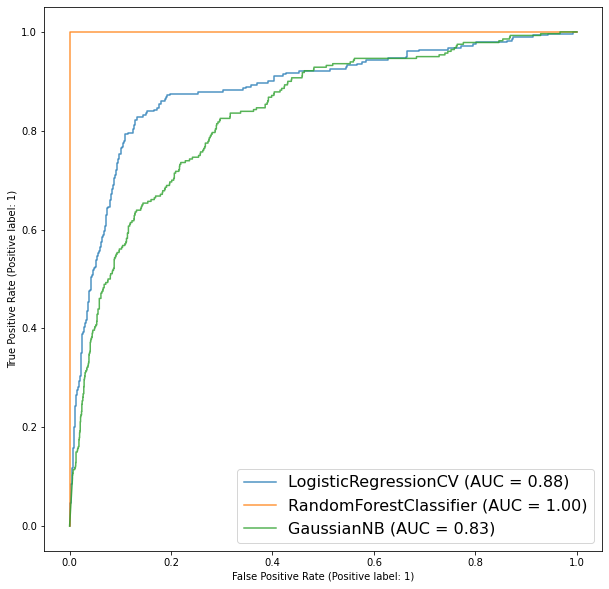

In [46]:
plt.figure(figsize=(10,10))
ax = plt.gca()
log_disp = plot_roc_curve(log, X_validation, y_validation, ax=ax, alpha=0.8)
forest_disp = plot_roc_curve(forest, X_validation, y_validation, ax=ax, alpha=0.8)
NB_disp = plot_roc_curve(NB, X_validation, y_validation, ax=ax, alpha=0.8)
plt.legend(loc = 'lower right', prop={'size': 16})
plt.show()

##### Model Improvement

In [47]:
params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}
RandomForest = RandomForestClassifier()
randomgrid_forest = RandomizedSearchCV(estimator=RandomForest, param_distributions = params, 
                               cv=5, n_iter=25, scoring = 'accuracy',
                               n_jobs = 4, verbose = 3, random_state = 42,
                               return_train_score = True)
randomgrid_forest.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=3)

In [48]:
randomgrid_forest.score(X_validation, y_validation)

0.8994050838290968

In [49]:
forest_preds = randomgrid_forest.predict(X_validation)
roc_auc_score(forest_preds, y_validation)

0.8253784492520413

In [50]:
log.C_

array([0.00077426])

In [51]:
log.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [52]:
log.coef_

array([[ 2.75544353e-02, -4.34200325e-04, -1.57862288e-02,
        -2.66180356e-04,  7.92203749e-03,  1.09889379e-05,
        -2.92468569e-03, -4.29024129e-03,  8.11715675e-02,
        -7.74710300e-03, -5.74790194e-02, -1.73399883e-02,
        -2.89084199e-02, -3.68202223e-02, -4.15240981e-03,
        -4.32718194e-03, -1.43698292e-02, -4.12389707e-03,
         1.84938371e-03, -3.49453848e-04, -1.24368026e-02,
        -2.76480080e-02,  1.43450893e-02,  1.93071522e-03,
        -1.34121229e-03,  4.57668693e-03,  1.91140397e-03,
        -5.29592876e-02]])

In [53]:
log.score(X_validation, y_validation)

0.8788534342888048

In [68]:
log_pred = log.predict(X_validation)
roc_auc_score(log_pred, y_validation)

0.806264912620107

after tuning some hyperparam for both logisticregression and randomforest, it turns out that randomforest will be our pick for this dataset

In [69]:
forest_preds = randomgrid_forest.predict(X_holdouttest)
roc_auc_score(forest_preds, y_holdouttest)

0.8343528898907597

##### Model Inference

In [54]:
cust1 = [[ 1,0,0,0,0,0,0.2,0.2,0,0,1,2,1,5,1,0,0,1,0,0,0,0,0,0,0,0,0,1]]

In [55]:
randomgrid_forest.predict(cust1)

array([0], dtype=int64)

Model Saving

In [56]:
import pickle
pickle.dump(randomgrid_forest, open("best_model.pkl", "wb"))